In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [3]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [4]:
df['Дата'] = pd.to_datetime(df['Дата'], dayfirst=True, errors='coerce')

In [5]:
print(df.dtypes)       
print(df['Дата'].head())

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object
0   2018-04-01
1   2018-04-01
2   2018-04-01
3   2018-04-01
4   2018-04-01
Name: Дата, dtype: datetime64[ns]


Сгруппируйте данные по дате, посчитайте количество продаж

In [6]:
grouped_df = df.groupby('Дата').size().reset_index(name='Количество_продаж')

Вывести несколько первых строк сгруппированных данных

In [8]:
print(grouped_df.head())

        Дата  Количество_продаж
0 2018-01-02               1521
1 2018-01-03               1387
2 2018-01-04               1455
3 2018-01-05               1481
4 2018-01-06               1467


Нарисуйте график продаж у `grouped_df`

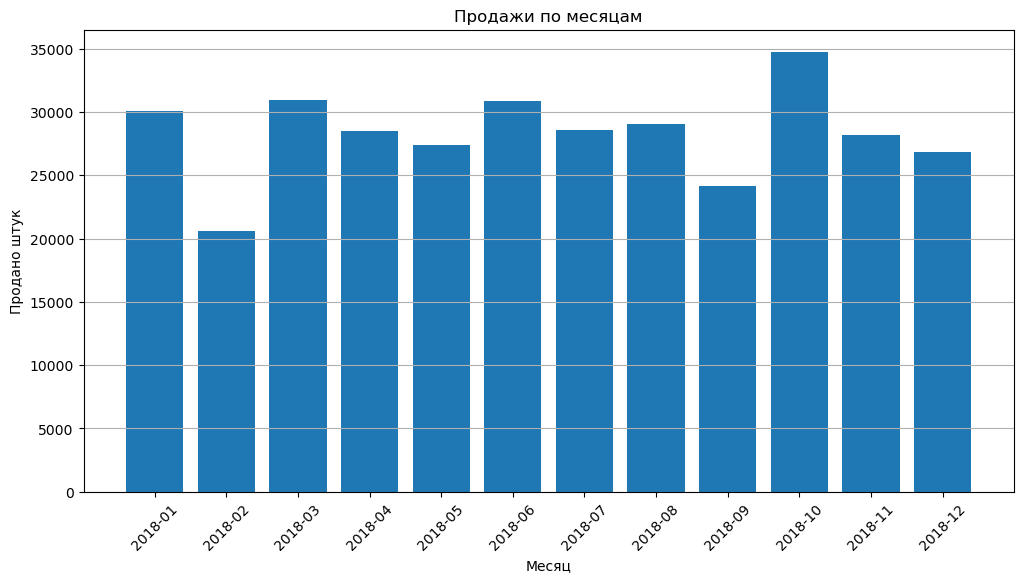

In [10]:
df['Месяц'] = df['Дата'].dt.to_period('M')

# Группировка по месяцам
grouped_month = df.groupby('Месяц')['Количество'].sum().reset_index()

# Построим график
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(grouped_month['Месяц'].astype(str), grouped_month['Количество'])

plt.title('Продажи по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Продано штук')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
# Продажи в течение года волнообразны: периоды роста сменяются спадами. 
#В октябре 2018 года пик продаж (35000), самые низкие продажи - в феврале 2018 г. 

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [11]:
max_row = df.loc[df['Количество'].idxmax()]
print(max_row)

Дата                    NaT
Склад                     1
Контрагент      address_208
Номенклатура      product_0
Количество              200
Месяц                   NaT
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [14]:
# Убедимся, что "Дата" в datetime
df['Дата'] = pd.to_datetime(df['Дата'], dayfirst=True, errors='coerce')

# Фильтр: летние месяцы + среды + склад №3
mask = (
    (df['Дата'].dt.month.isin([6, 7, 8])) &
    (df['Дата'].dt.dayofweek == 2) &   # 0=понедельник, ..., 2=среда
    (df['Склад'] == 3)
)

filtered = df[mask]

# Группировка по товару
top_product = (
    filtered.groupby('Номенклатура')['Количество']
    .sum()
    .reset_index()
    .sort_values(by='Количество', ascending=False)
)

print(top_product.head(1))  # топовый товар

  Номенклатура  Количество
1    product_1         479


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [21]:
print(weather.head())
print(weather.columns)

     дата;температура;;
0  31.08.2018 23:30;8;;
1  31.08.2018 23:00;7;;
2  31.08.2018 22:30;8;;
3  31.08.2018 22:00;9;;
4  31.08.2018 21:30;9;;
Index(['дата;температура;;'], dtype='object')


In [22]:
import pandas as pd

# 1. Чтение CSV с правильным разделителем
weather = pd.read_csv("weather.csv", sep=";", encoding='cp1251', usecols=[0,1])  # берём только первые 2 столбца

# 2. Переименуем столбцы
weather.columns = ['Дата', 'Температура']

# 3. Преобразуем дату
weather['Дата'] = pd.to_datetime(weather['Дата'], dayfirst=True, errors='coerce')

# 4. Создаём столбец только с датой
weather['День'] = weather['Дата'].dt.date

# 5. Считаем среднюю температуру за день
weather_daily = weather.groupby('День')['Температура'].mean().reset_index()
weather_daily['День'] = pd.to_datetime(weather_daily['День'])

print(weather_daily.head())

        День  Температура
0 2018-01-04   -21.875000
1 2018-01-05   -23.687500
2 2018-01-06   -20.812500
3 2018-01-07   -22.312500
4 2018-01-08   -20.020833


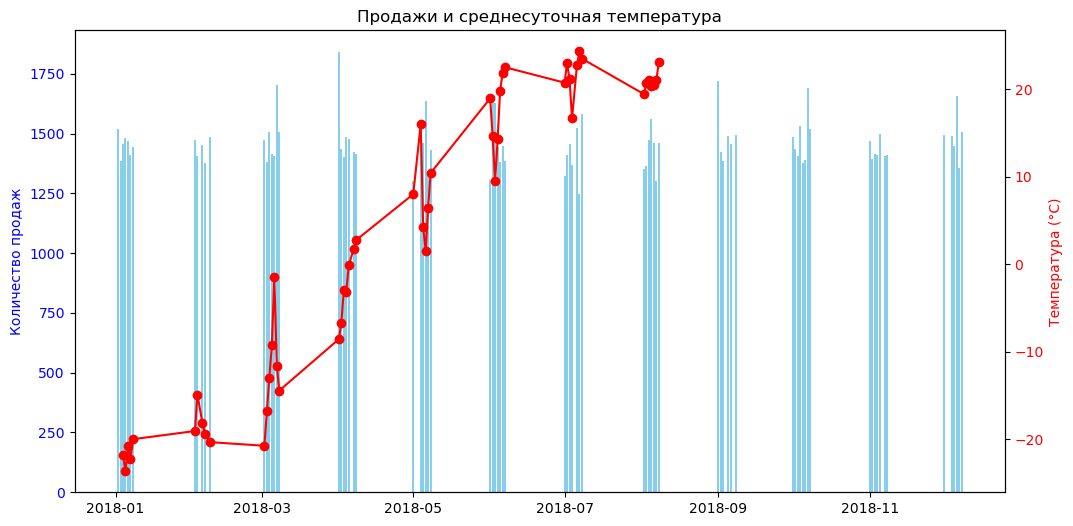

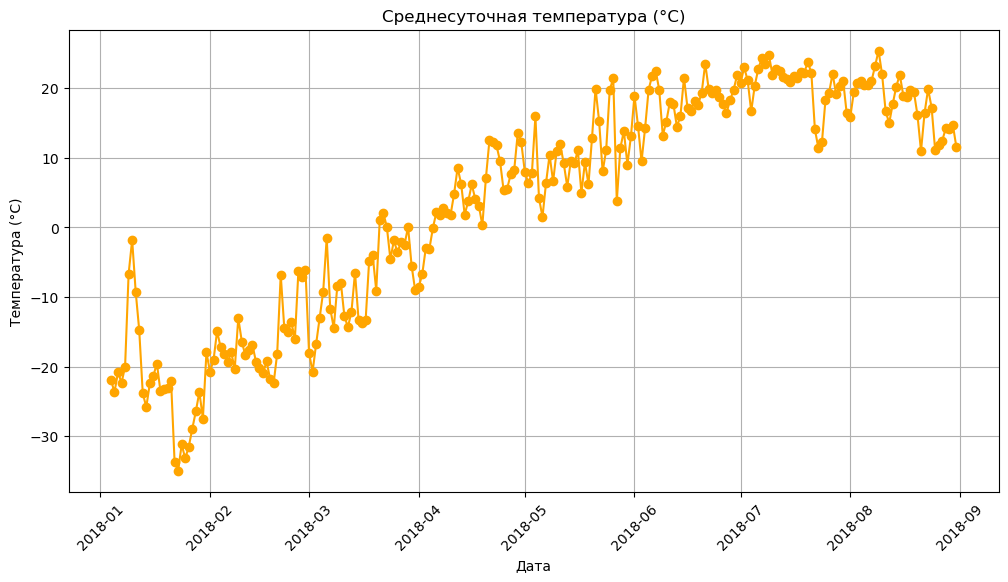

In [23]:
import matplotlib.pyplot as plt

# Предположим, grouped_df содержит ['Дата', 'Количество_продаж']
merged = pd.merge(grouped_df, weather_daily, left_on='Дата', right_on='День', how='left')

# 1. Продажи и температура на одном графике
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(merged['Дата'], merged['Количество_продаж'], color='skyblue', label='Продажи')
ax1.set_ylabel('Количество продаж', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(merged['Дата'], merged['Температура'], color='red', marker='o', label='Температура')
ax2.set_ylabel('Температура (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Продажи и среднесуточная температура")
plt.xticks(rotation=45)
plt.show()

# 2. График только температуры
plt.figure(figsize=(12,6))
plt.plot(weather_daily['День'], weather_daily['Температура'], color='orange', marker='o')
plt.title('Среднесуточная температура (°C)')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()